# Using Tensorboard in DeepChem

DeepChem Neural Networks models are built on top of [tensorflow](https://www.tensorflow.org).  [Tensorboard](https://www.tensorflow.org/get_started/summaries_and_tensorboard) is a powerful visualization tool in tensorflow for viewing your model architecture and performance. 

In this tutorial we will show how to turn on tensorboard logging for our models, and go show the network architecture for some of our more popular models.

The first thing we have to do is load a dataset that we will monitor model performance over.

In [1]:
from IPython.display import Image, display
import deepchem as dc
from deepchem.molnet import load_tox21
from deepchem.models.graph_models import GraphConvModel

# Load Tox21 dataset
tox21_tasks, tox21_datasets, transformers = load_tox21(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = tox21_datasets



/home/leswing/miniconda3/envs/l25dfIi9oAFfmEN6/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


Now we will create our model with tensorboard on.  All we have to do to turn tensorboard on is pass the tensorboard=True flag to the constructor of our model

In [2]:
# Construct the model with tensorbaord on
model = GraphConvModel(len(tox21_tasks),  mode='classification', tensorboard=True, model_dir='models')

# Fit the model
model.fit(train_dataset, nb_epoch=10)

/home/leswing/miniconda3/envs/l25dfIi9oAFfmEN6/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Starting epoch 0
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Ending global_step 630: Average loss 932.451
TIMING: model fitting took 52.909 s


932.4511722625248

### Viewing the Tensorboard output
When tensorboard is turned on we log all the files needed for tensorboard in model.model_dir.  To launch the tensorboard webserver we have to call in a terminal
```bash
tensorboard --logdir models/ --port 6006
```

This will launch the tensorboard web server on your local computer on port 6006.  Go to http://localhost:6006 in your web browser to look through tensorboard's UI.

The first thing you will see is a graph of the loss vs mini-batches.  You can use this data to determine if your model is still improving it's loss function over time or to find out if your gradients are exploding!.

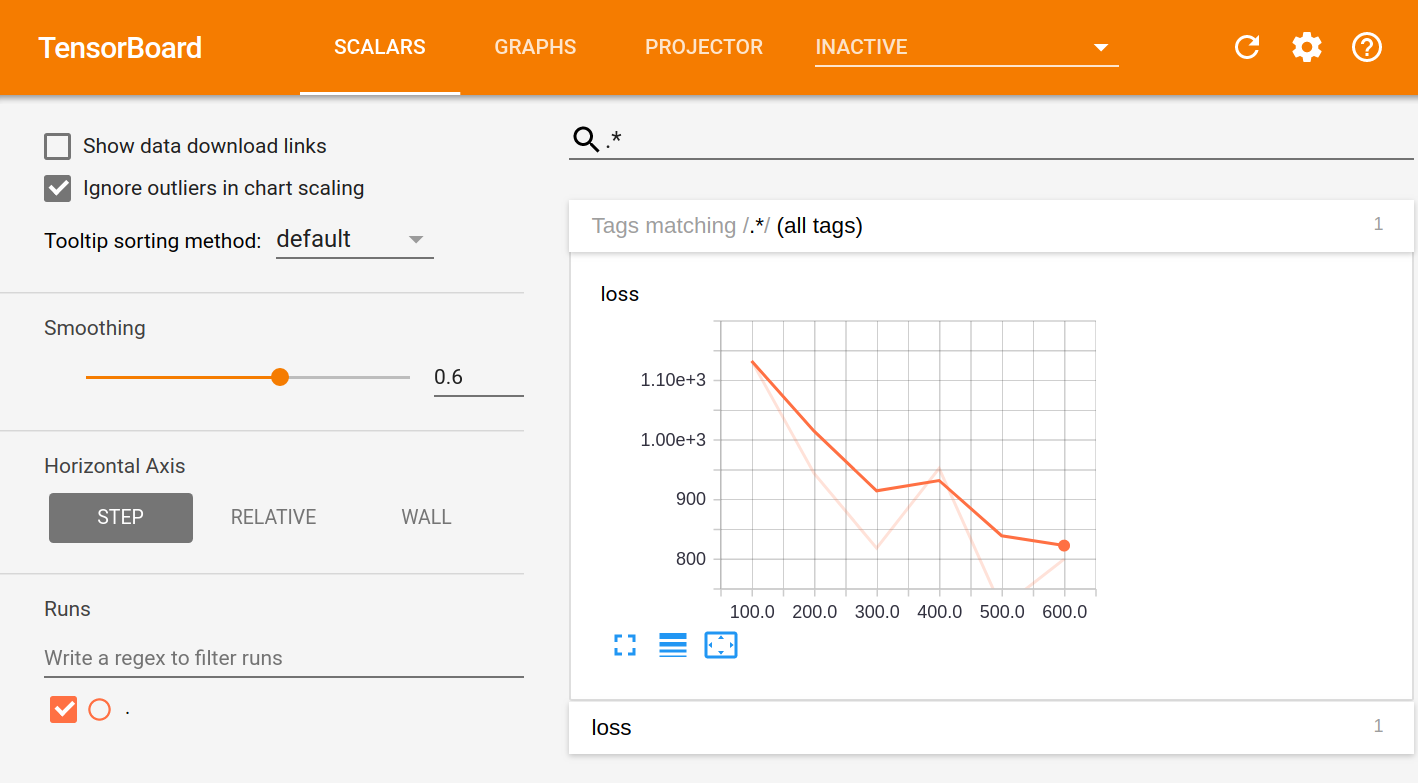

In [3]:
display(Image(filename='assets/tensorboard_landing.png'))

If you click "GRAPHS" at the top you can see a visual layout of the model.  Here is what our GraphConvModel Model looks like

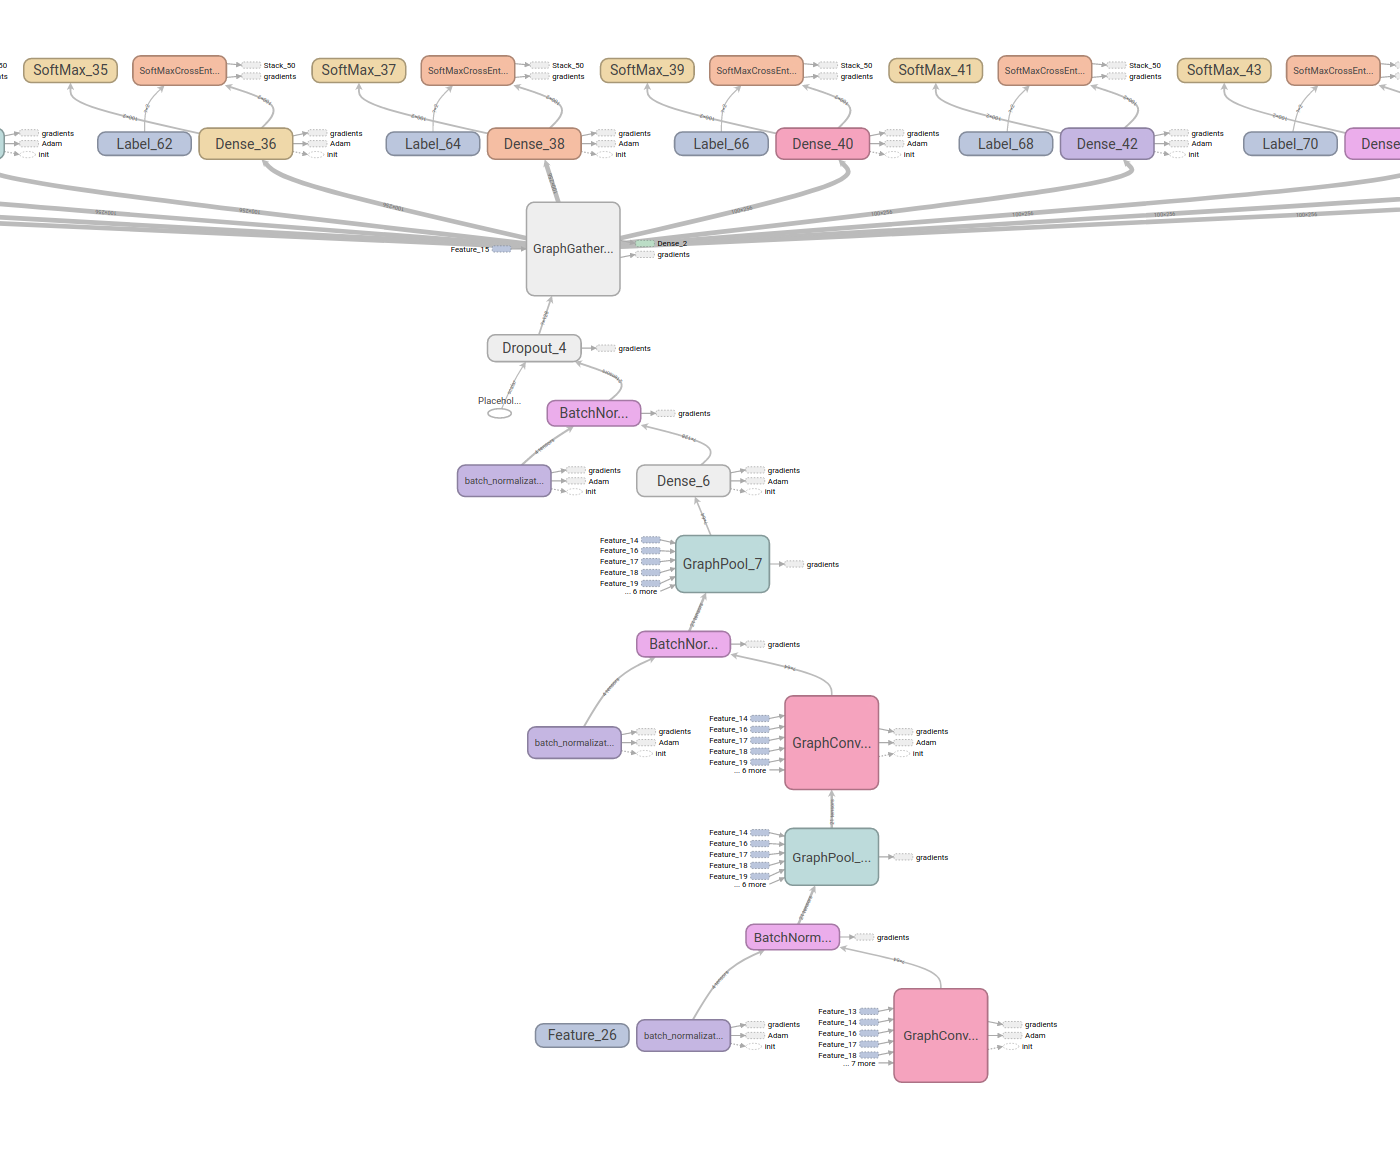

In [4]:
display(Image(filename='assets/GraphConvArch.png'))

The "GraphGather" box is the "Neural Fingerprint" developed by learning features of the molecule via graph convolutions.

Using tensorboard to visualize the model is a fast way to get a high level understanding of what a model is made of and how it works!